# Exploratory data analysis

In [1]:
from calibration.dataprocessing import loaddata, processBAMdata
import download_airnow_web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from airpollutionmodel import preprocessing
from airpollutionmodel.sensors import Sensor, Network
import plotly.graph_objects as go
import plotly.express as px

In [2]:
embassy_data = download_airnow_web.download('Kampala')
embassy_data['pm2_5'] = embassy_data['Raw Conc.']
embassy_data['created_at'] = embassy_data['Date (LT)']
embassy_data['channel_id']=-1
embassy_data['latitude'] = 0.299333
embassy_data['longitude'] = 32.592539

In [3]:
embassy_data.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pm2_5,created_at,channel_id,latitude,longitude
0,Kampala,PM2.5 - Principal,2021-01-28 01:00 PM,2021,1,28,13,-999.0,-999,NaN,34.0,UG/M3,1 Hr,Valid,34.0,2021-01-28 01:00 PM,-1,0.299333,32.592539
1,Kampala,PM2.5 - Principal,2021-01-28 02:00 PM,2021,1,28,14,39.0,110,Unhealthy for Sensitive Groups,43.0,UG/M3,1 Hr,Valid,43.0,2021-01-28 02:00 PM,-1,0.299333,32.592539
2,Kampala,PM2.5 - Principal,2021-01-28 03:00 PM,2021,1,28,15,38.6,109,Unhealthy for Sensitive Groups,38.0,UG/M3,1 Hr,Valid,38.0,2021-01-28 03:00 PM,-1,0.299333,32.592539
3,Kampala,PM2.5 - Principal,2021-01-28 04:00 PM,2021,1,28,16,38.3,108,Unhealthy for Sensitive Groups,38.0,UG/M3,1 Hr,Valid,38.0,2021-01-28 04:00 PM,-1,0.299333,32.592539
4,Kampala,PM2.5 - Principal,2021-01-28 05:00 PM,2021,1,28,17,35.3,100,Moderate,30.0,UG/M3,1 Hr,Valid,30.0,2021-01-28 05:00 PM,-1,0.299333,32.592539


In [4]:
bam_data = processBAMdata('../Data/BAM_Data', {'Y24517':-24517,'Y24516':-24516})

Device Ids: 
['Y24517' 'Y24516']


In [5]:
bam_data.head()

,Time,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),Flow(lpm),WS(m/s),WD(Deg),AT(C),RH(%),BP(mmHg),FT(C),FRH(%),Status,latitude,longitude,pm2_5,created_at,channel_id
2,2020-09-19 17:00:00,50.0,61.3,71.3,16.59,0.3,151,27.6,58,660.3,30.9,38,0,0.331705,32.60986,61.3,2020-09-19 17:00:00,-24517
3,2020-09-19 18:00:00,79.5,90.1,103.9,16.59,0.3,165,25.7,65,660.7,30.1,41,0,0.331705,32.60986,90.1,2020-09-19 18:00:00,-24517
4,2020-09-19 19:00:00,65.1,66.9,76.6,16.59,0.3,120,23.6,75,661.2,27.7,49,0,0.331705,32.60986,66.9,2020-09-19 19:00:00,-24517
7,2020-09-19 22:00:00,27.1,26.8,30.3,16.58,0.6,314,21.1,76,662.9,25.5,50,0,0.331705,32.60986,26.8,2020-09-19 22:00:00,-24517
8,2020-09-19 23:00:00,16.1,12.8,14.5,16.59,0.6,310,20.2,77,662.8,25.6,46,0,0.331705,32.60986,12.8,2020-09-19 23:00:00,-24517


In [6]:
airqo_data = preprocessing.get_data('../Data/sensor_data.csv', isAveraged = True, window = 'hour')

In [7]:
airqo_data

,channel_id,entry_id,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,voltage,altitude,wind,no_sats,hdope,temperature,humidity,created_at
0,689761,626164.000000,46.889070,57.215116,3331.685349,3331.685349,0.313893,32.589983,4.076279,1176.458140,0.250930,7.162791,145.604651,0.000000,8.0,2021-02-28 00:00:00
1,689761,626207.000000,53.140465,61.187907,3332.060930,3332.060930,0.313788,32.590054,4.076977,1182.213953,0.236977,7.906977,127.906977,0.000000,8.0,2021-02-28 01:00:00
2,689761,626250.500000,54.099545,62.074773,3332.172955,3332.172955,0.313949,32.590000,4.077727,1178.131818,0.095909,7.681818,142.363636,0.000000,8.0,2021-02-28 02:00:00
3,689761,626294.500000,63.442273,69.157045,3332.136818,3332.136818,0.313878,32.589962,4.076136,1177.318182,0.135227,8.795455,128.204545,0.000000,8.0,2021-02-28 03:00:00
4,689761,626338.500000,73.648864,77.528182,3332.459545,3332.459545,0.313931,32.589992,4.076364,1165.281818,0.194318,9.386364,179.886364,0.000000,8.0,2021-02-28 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,967601,100113.750000,0.000000,0.000000,26.135000,28.953750,0.299198,32.592662,3.376250,1217.287500,0.502500,6.000000,265.500000,28.500000,0.0,2021-03-05 01:00:00
2499,967601,100136.000000,0.000000,0.000000,50.809231,62.984615,0.299308,32.592598,3.392308,1193.361538,0.507692,5.307692,350.000000,28.076923,0.0,2021-03-05 02:00:00
2500,967601,100150.214286,0.000000,0.000000,75.896429,84.469286,0.299262,32.592596,3.338571,1226.357143,0.490000,6.000000,228.428571,27.500000,0.0,2021-03-05 03:00:00
2501,967601,100166.647059,0.000000,0.000000,71.417647,78.995882,0.299213,32.592465,3.374706,1223.023529,1.001765,6.117647,243.647059,27.000000,0.0,2021-03-05 04:00:00


In [35]:
location_var = data.groupby(['channel_id']).var()[['latitude', 'longitude']]
location_var['combined'] = location_var['latitude'] + location_var['longitude']
most_mobile = list(location_var.sort_values(by = 'combined', ascending = False).iloc[:5].index)

## Mapping

In [38]:
def plot_channel(data, channels, path = False):
    if type(channels) == str:
        channels = [channels]
    channel_data = data[data['channel_id'].isin(channels)]
    if path:
        fig = px.line_mapbox(channel_data, lat="latitude", lon="longitude", color = 'channel_id', hover_name="channel_id", hover_data=['created_at', 'pm2_5'],
                            zoom=11, height=100, line_group = 'channel_id')
    else:
        fig = px.scatter_mapbox(channel_data, lat="latitude", lon="longitude", color = 'channel_id', hover_name="channel_id", hover_data=['created_at', 'pm2_5'],
                            zoom=11, height=300)
        
    fig.update_layout(mapbox_style="carto-positron",
                      margin={"r":0,"t":0,"l":0,"b":0},
                      width = 900,
                      height = 600)
    fig.show()

plot_channel(data, most_mobile, path = True)

In [7]:
network = Network(data)

In [8]:
network.IDs

[832253,
 832251,
 737276,
 870147,
 870142,
 912221,
 718029,
 930427,
 755612,
 870140,
 782718,
 832252,
 912225,
 730014,
 870146,
 782719,
 782722,
 832254,
 689761,
 782721,
 912220,
 967601,
 782720,
 967600]

In [9]:
data755 = network.sensor_data(755612)
data755

,created_at,channel_id,entry_id,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,voltage,altitude,wind,no_sats,hdope,temperature,humidity
0,2021-02-28 00:00:42,755612,544315,44.07,53.23,46.43,56.60,0.289012,32.589596,4.27,1174.0,0.02,10.0,80.0,255.0,255.0
1,2021-02-28 00:02:12,755612,544316,43.57,52.08,46.60,56.27,0.288998,32.589577,4.28,1174.6,0.01,8.0,93.0,255.0,255.0
2,2021-02-28 00:03:33,755612,544317,43.65,52.22,45.08,53.55,0.289006,32.589584,4.27,1178.5,0.03,10.0,86.0,255.0,255.0
3,2021-02-28 00:04:56,755612,544318,42.27,50.77,46.53,56.62,0.289066,32.589584,4.28,1184.0,0.02,10.0,100.0,255.0,255.0
4,2021-02-28 00:06:11,755612,544319,43.10,52.43,46.73,56.47,0.289018,32.589596,4.27,1177.8,0.01,10.0,89.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,2021-03-05 05:50:33,755612,548524,49.05,61.20,55.05,66.18,0.289018,32.589508,4.27,1174.1,0.02,9.0,92.0,255.0,255.0
4210,2021-03-05 05:51:59,755612,548525,51.88,64.17,57.95,68.05,0.289034,32.589531,4.27,1178.8,0.04,12.0,74.0,255.0,255.0
4211,2021-03-05 05:53:21,755612,548526,53.93,64.82,62.17,70.57,0.289018,32.589531,4.27,1181.2,0.03,12.0,74.0,255.0,255.0
4212,2021-03-05 05:57:51,755612,548527,55.38,67.78,65.50,72.93,0.289035,32.589546,4.27,1191.7,0.14,11.0,74.0,255.0,255.0


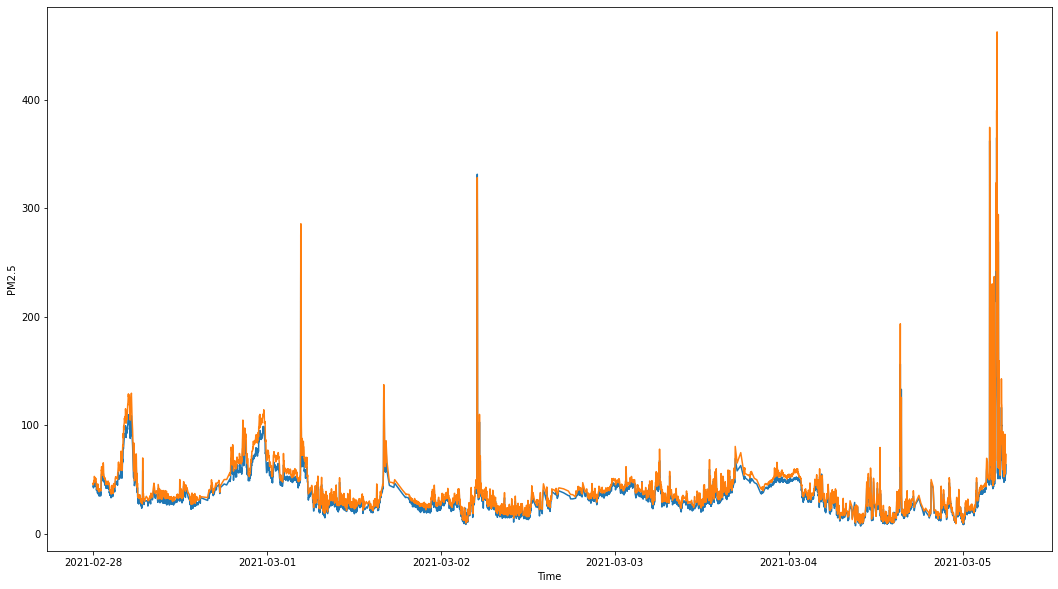

In [10]:
dates = pd.date_range(data755['created_at'].min(), data755['created_at'].max())
plt.figure(figsize = (18, 10))
plt.plot(data755['created_at'], data755['pm2_5'])
plt.plot(data755['created_at'], data755['s2_pm2_5'])
plt.xticks(ticks = dates)
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.show()